<a href="https://colab.research.google.com/github/100406260/PySpark/blob/main/Apache_PySpark_by_Example_LINKEDIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apache PySpark by Example

**[June 2023 update]**

I've consolidated all the notebooks for this course into a single notebook. (The course videos will still show individual notebooks)


## Introduction to Google Colab

### Jupyter notebook basics

#### Code cells

#### Text cells

### Access to the shell

## Install Spark

- Google colab recently made some changes which breaks the Spark installation.
- Please use the code below where we install from the pyspark package instead

In [ ]:
!pip install pyspark==3.4.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317122 sha256=9d0b98fe39a228b0f01f4c48f3c547493e7e61c06e3034963bb77caa0e8cfccb
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [3]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark

## (02-02) Download Chicago's Reported Crime Data

### Downloading and preprocessing Chicago's Reported Crime Data

In [4]:
!wget https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
!ls -l

--2024-05-27 06:29:13--  https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.68.26, 52.206.140.205, 52.206.140.199
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [   <=>              ]   1.77G  3.12MB/s    in 13m 2s  

2024-05-27 06:42:17 (2.32 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [1905516889]

total 2957392
-rw-r--r-- 1 root root 1122834178 May 27 06:25  reported-crimes.csv
-rw-r--r-- 1 root root 1905516889 May 26 10:51 'rows.csv?accessType=DOWNLOAD'
drwxr-xr-x 1 root root       4096 May 23 13:25  sample_data


In [5]:
!mv rows.csv\?accessType\=DOWNLOAD reported-crimes.csv
!ls -l

total 1860868
-rw-r--r-- 1 root root 1905516889 May 26 10:51 reported-crimes.csv
drwxr-xr-x 1 root root       4096 May 23 13:25 sample_data


In [6]:
from pyspark.sql.functions import to_timestamp,col,lit
rc = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') <= lit('2018-11-11'))
rc.show(5)

+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|             Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
| 5741943|   HN549294|2007-08-25 09:22:18|074XX N ROGERS AVE|0560|             ASSAULT|              SIMPLE|               OTHER| false|   false|2422|     024|  49|             1|     08A|     

## (03-03) Schemas

## (03-04) Working with columns

**Display only the first 5 rows of the column name IUCR**

In [7]:
rc.select('IUCR').show(5)

+----+
|IUCR|
+----+
|0560|
|0820|
|1753|
|1753|
|1753|
+----+
only showing top 5 rows



  **Display only the first 4 rows of the column names Case Number, Date and Arrest**

In [8]:
rc.select('Case Number', 'Date', 'Arrest').show(4)

+-----------+-------------------+------+
|Case Number|               Date|Arrest|
+-----------+-------------------+------+
|   HN549294|2007-08-25 09:22:18| false|
|   HH109118|2002-01-05 21:24:00|  true|
|   JE293464|2011-08-10 00:01:00| false|
|   JE439378|2015-09-24 00:00:00| false|
+-----------+-------------------+------+
only showing top 4 rows



**Add a column with name One, with entries all 1s**

In [10]:
from pyspark.sql.functions import lit

In [11]:
rc.withColumn('One', lit(1)).show(5)

+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+---+
|      ID|Case Number|               Date|             Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|One|
+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+---+
| 5741943|   HN549294|2007-08-25 09:22:18|074XX N ROGERS AVE|0560|             ASSAULT|              SIMPLE|               OTHER| false|   false|2422|     024|  49|             1|  

**Remove the column IUCR**

In [12]:
rc.drop('IUCR').show(5)

+--------+-----------+-------------------+------------------+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|             Block|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+------------------+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
| 5741943|   HN549294|2007-08-25 09:22:18|074XX N ROGERS AVE|             ASSAULT|              SIMPLE|               OTHER| false|   false|2422|     024|  49|             1|     08A|        null|        null

## (03-05) Working with rows

**Add the reported crimes for an additional day, 12-Nov-2018, to our dataset.**

In [13]:
one_day = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') <= lit('2018-11-12'))

In [21]:
rc = rc.union(one_day)

In [26]:
rc.orderBy('Date', ascending=False).show(6)

ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/local/lib/python3.10/dist-packages/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: 

**What are the top 10 number of reported crimes by Primary type, in descending order of occurence?**

In [ ]:
rc.groupBy('Primary Type').count().orderBy('count', ascending=False).show(10)

## (03-06) Challenge

**What percentage of reported crimes resulted in an arrest?**

In [ ]:
rc.select('Arrest').distinct().show()

In [ ]:
rc.printSchema()

In [ ]:
rc.filter(col('Arrest') == 'true')/rc.select('Arrest').count()

  **What are the top 3 locations for reported crimes?**

In [ ]:
rc.groupbBy('Location Description').count().orderBy('count', ascending=False).show()

## (04-01) Built-in functions

In [27]:
from pyspark.sql import functions

In [28]:
print(dir(functions))

['Any', 'ArrayType', 'Callable', 'Column', 'DataFrame', 'DataType', 'Dict', 'Iterable', 'JVMView', 'List', 'Optional', 'PandasUDFType', 'PySparkTypeError', 'PySparkValueError', 'PythonEvalType', 'SparkContext', 'StringType', 'StructType', 'TYPE_CHECKING', 'Tuple', 'Union', 'UserDefinedFunction', 'ValuesView', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_create_column_from_literal', '_create_lambda', '_create_py_udf', '_from_numpy_type', '_get_jvm_function', '_get_lambda_parameters', '_invoke_binary_math_function', '_invoke_function', '_invoke_function_over_columns', '_invoke_function_over_seq_of_columns', '_invoke_higher_order_function', '_options_to_str', '_test', '_to_java_column', '_to_seq', '_unresolved_named_lambda_variable', 'abs', 'acos', 'acosh', 'add_months', 'aggregate', 'approxCountDistinct', 'approx_count_distinct', 'array', 'array_append', 'array_compact', 'array_contains', 'array_distinct', 'array_except', 'ar

### String functions

**Display the Primary Type column in lower and upper characters, and the first 4 characters of the column**

In [29]:
from pyspark.sql.functions import lower, upper, substring

In [30]:
help(substring)

Help on function substring in module pyspark.sql.functions:

substring(str: 'ColumnOrName', pos: int, len: int) -> pyspark.sql.column.Column
    Substring starts at `pos` and is of length `len` when str is String type or
    returns the slice of byte array that starts at `pos` in byte and is of length `len`
    when str is Binary type.
    
    .. versionadded:: 1.5.0
    
    .. versionchanged:: 3.4.0
        Supports Spark Connect.
    
    Notes
    -----
    The position is not zero based, but 1 based index.
    
    Parameters
    ----------
    str : :class:`~pyspark.sql.Column` or str
        target column to work on.
    pos : int
        starting position in str.
    len : int
        length of chars.
    
    Returns
    -------
    :class:`~pyspark.sql.Column`
        substring of given value.
    
    Examples
    --------
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(substring(df.s, 1, 2).alias('s')).collect()
    [Row(s='ab')]



In [34]:
rc.select(lower(col('Primary Type')), upper(col('Primary Type')), substring(col('Primary Type'),1,4)).show(5)

+--------------------+--------------------+-----------------------------+
| lower(Primary Type)| upper(Primary Type)|substring(Primary Type, 1, 4)|
+--------------------+--------------------+-----------------------------+
|             assault|             ASSAULT|                         ASSA|
|               theft|               THEFT|                         THEF|
|offense involving...|OFFENSE INVOLVING...|                         OFFE|
|offense involving...|OFFENSE INVOLVING...|                         OFFE|
|offense involving...|OFFENSE INVOLVING...|                         OFFE|
+--------------------+--------------------+-----------------------------+
only showing top 5 rows



### Numeric functions


**Show the oldest date and the most recent date**

In [37]:
from pyspark.sql.functions import min,max

In [39]:
rc.select(min(col('Date')), max(col('Date'))).show()

+-------------------+-------------------+
|          min(Date)|          max(Date)|
+-------------------+-------------------+
|2001-01-01 00:00:00|2018-11-12 00:00:00|
+-------------------+-------------------+



### Date

**What is 3 days earlier that the oldest date and 3 days later than the most recent date?**

In [40]:
from pyspark.sql.functions import date_sub, date_add

In [41]:
help(date_add)

Help on function date_add in module pyspark.sql.functions:

date_add(start: 'ColumnOrName', days: Union[ForwardRef('ColumnOrName'), int]) -> pyspark.sql.column.Column
    Returns the date that is `days` days after `start`. If `days` is a negative value
    then these amount of days will be deducted from `start`.
    
    .. versionadded:: 1.5.0
    
    .. versionchanged:: 3.4.0
        Supports Spark Connect.
    
    Parameters
    ----------
    start : :class:`~pyspark.sql.Column` or str
        date column to work on.
    days : :class:`~pyspark.sql.Column` or str or int
        how many days after the given date to calculate.
        Accepts negative value as well to calculate backwards in time.
    
    Returns
    -------
    :class:`~pyspark.sql.Column`
        a date after/before given number of days.
    
    Examples
    --------
    >>> df = spark.createDataFrame([('2015-04-08', 2,)], ['dt', 'add'])
    >>> df.select(date_add(df.dt, 1).alias('next_date')).collect()
    [Ro

In [43]:
rc.select(date_sub(min('Date'),3), date_add(max('Date'),3)).show()

+----------------------+----------------------+
|date_sub(min(Date), 3)|date_add(max(Date), 3)|
+----------------------+----------------------+
|            2000-12-29|            2018-11-15|
+----------------------+----------------------+



## (04-02) Working with dates

In [45]:
from pyspark.sql.functions import to_date, to_timestamp, lit

  **2019-12-25 13:30:00**

In [48]:
df = spark.createDataFrame([('2019-12-25 13:30:00',)],['Christmas'])

df.show()

+-------------------+
|          Christmas|
+-------------------+
|2019-12-25 13:30:00|
+-------------------+



In [50]:
df.select(to_date(col('Christmas'), 'yyyy-MM-dd HH:mm:ss'), to_timestamp(col('Christmas'),'yyyy-MM-dd HH:mm:ss')).show()

+---------------------------------------+--------------------------------------------+
|to_date(Christmas, yyyy-MM-dd HH:mm:ss)|to_timestamp(Christmas, yyyy-MM-dd HH:mm:ss)|
+---------------------------------------+--------------------------------------------+
|                             2019-12-25|                         2019-12-25 13:30:00|
+---------------------------------------+--------------------------------------------+



**25/Dec/2019 13:30:00**

In [51]:
df = spark.createDataFrame([('25/Dec/2019 13:30:00',)],['Christmas'])

df.show()


+--------------------+
|           Christmas|
+--------------------+
|25/Dec/2019 13:30:00|
+--------------------+



In [52]:
df.select(to_date(col('Christmas'), 'dd/MMM/yyyy HH:mm:ss'), to_timestamp(col('Christmas'),'dd/MMM/yyyy HH:mm:ss')).show()

+----------------------------------------+---------------------------------------------+
|to_date(Christmas, dd/MMM/yyyy HH:mm:ss)|to_timestamp(Christmas, dd/MMM/yyyy HH:mm:ss)|
+----------------------------------------+---------------------------------------------+
|                              2019-12-25|                          2019-12-25 13:30:00|
+----------------------------------------+---------------------------------------------+



**12/25/2019 01:30:00 PM**

In [54]:
df = spark.createDataFrame([('12/25/2019 01:30:00 PM',)],['Christmas'])

df.show(truncate=False)

+----------------------+
|Christmas             |
+----------------------+
|12/25/2019 01:30:00 PM|
+----------------------+



In [57]:
df.select(to_date(col('Christmas'), 'MM/dd/yyyy hh:mm:ss a'), to_timestamp(col('Christmas'),'MM/dd/yyyy hh:mm:ss a')).show()

+-----------------------------------------+----------------------------------------------+
|to_date(Christmas, MM/dd/yyyy hh:mm:ss a)|to_timestamp(Christmas, MM/dd/yyyy hh:mm:ss a)|
+-----------------------------------------+----------------------------------------------+
|                               2019-12-25|                           2019-12-25 13:30:00|
+-----------------------------------------+----------------------------------------------+



## (04-03) Joins

**Download police station data**

In [64]:
!wget -o police-stations.csv https://data.cityofchicago.org/resource/z8bn-74gv.csv

!ls -l

!mv z8bn-74gv.csv police-stations.csv

!ls -l


total 1860888
-rw-r--r-- 1 root root        536 May 27 08:15 police-stations.csv
-rw-r--r-- 1 root root 1905516889 May 26 10:51 reported-crimes.csv
drwxr-xr-x 1 root root       4096 May 23 13:25 sample_data
-rw-r--r-- 1 root root       6365 Aug 19  2019 z8bn-74gv.csv
-rw-r--r-- 1 root root       6365 Aug 19  2019 z8bn-74gv.csv.1
total 1860884
-rw-r--r-- 1 root root       6365 Aug 19  2019 police-stations.csv
-rw-r--r-- 1 root root 1905516889 May 26 10:51 reported-crimes.csv
drwxr-xr-x 1 root root       4096 May 23 13:25 sample_data
-rw-r--r-- 1 root root       6365 Aug 19  2019 z8bn-74gv.csv.1


In [65]:
ps = spark.read.csv('police-stations.csv', header=True)

ps.show(5)

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|    district|district_name|            address|   city|state|  zip|             website|       phone|         fax|         tty|x_coordinate|y_coordinate|   latitude|   longitude|            location|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        null|        null|        null| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 1172080.029| 1908086.527|41.90324165|-87.64335214|(41.9032416531, -

DataFrame[district: string, district_name: string, address: string, city: string, state: string, zip: string, website: string, phone: string, fax: string, tty: string, x_coordinate: string, y_coordinate: string, latitude: string, longitude: string, location: string]

**The reported crimes dataset has only the district number. Add the district name by joining with the police station dataset**

In [66]:
rc.cache()
rc.count()

13514833

In [67]:
ps.select(col('District')).distinct().show()

+------------+
|    District|
+------------+
|           7|
|          15|
|          11|
|           3|
|           8|
|          22|
|          16|
|           5|
|          18|
|          17|
|           6|
|          19|
|          25|
| ","Chicago"|
|Headquarters|
|          24|
|           9|
|           1|
|          20|
|          10|
+------------+
only showing top 20 rows



In [72]:
rc.select('DISTRICT').show()

+--------+
|DISTRICT|
+--------+
|     024|
|     005|
|     009|
|     009|
|     009|
|     025|
|     010|
|     006|
|     010|
|     009|
|     004|
|     001|
|     017|
|     018|
|     004|
|     002|
|     022|
|     017|
|     008|
|     025|
+--------+
only showing top 20 rows



In [74]:
from pyspark.sql.functions import lpad

In [75]:
help(lpad)

Help on function lpad in module pyspark.sql.functions:

lpad(col: 'ColumnOrName', len: int, pad: str) -> pyspark.sql.column.Column
    Left-pad the string column to width `len` with `pad`.
    
    .. versionadded:: 1.5.0
    
    .. versionchanged:: 3.4.0
        Supports Spark Connect.
    
    Parameters
    ----------
    col : :class:`~pyspark.sql.Column` or str
        target column to work on.
    len : int
        length of the final string.
    pad : str
        chars to prepend.
    
    Returns
    -------
    :class:`~pyspark.sql.Column`
        left padded result.
    
    Examples
    --------
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(lpad(df.s, 6, '#').alias('s')).collect()
    [Row(s='##abcd')]



In [76]:
ps.select(lpad('DISTRICT', 3,'0')).show()

+--------------------+
|lpad(DISTRICT, 3, 0)|
+--------------------+
|                 Hea|
|                 018|
|                 019|
|                 020|
|                 022|
|                 024|
|                 025|
|                 001|
|                 002|
|                 003|
|                 004|
|                 005|
|                 006|
|                 007|
|                 008|
|                 009|
|                 010|
|                 011|
|                 012|
|                 ","|
+--------------------+
only showing top 20 rows



In [80]:
ps = ps.withColumn('format_district', lpad(col('DISTRICT'), 3,'0'))

ps.show()

+------------+--------------+--------------------+--------------------+------------+------------+--------------------+------------+------------+------------+------------+--------------------+-----------+------------+--------------------+---------------+
|    district| district_name|             address|                city|       state|         zip|             website|       phone|         fax|         tty|x_coordinate|        y_coordinate|   latitude|   longitude|            location|format_district|
+------------+--------------+--------------------+--------------------+------------+------------+--------------------+------------+------------+------------+------------+--------------------+-----------+------------+--------------------+---------------+
|Headquarters|  Headquarters| 3510 S Michigan Ave|             Chicago|          IL|       60653|http://home.chica...|        null|        null|        null| 1177731.401|         1881697.404|41.83070169|-87.62339535|(41.8307016873, -...| 

In [82]:
rc.join(ps, rc.District == ps.format_district, 'left_outer').show()

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+--------+-------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|district|district_name|             address|   city|state|  zip|             website|       phone|         fax|         tty|x_coordinate|y_coordinate|   latitude|   longitude|            location|format_dist

In [83]:
ps.columns

['district',
 'district_name',
 'address',
 'city',
 'state',
 'zip',
 'website',
 'phone',
 'fax',
 'tty',
 'x_coordinate',
 'y_coordinate',
 'latitude',
 'longitude',
 'location',
 'format_district']

In [85]:
rc.join(ps, rc.District == ps.format_district, 'left_outer').drop(
    'address',
 'city',
 'state',
 'zip',
 'website',
 'phone',
 'fax',
 'tty',
 'x_coordinate',
 'y_coordinate',
 'latitude',
 'longitude',
 'location',
).show()

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+-------------+---------------+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|district|district_name|format_district|
+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+-------------+---------------+
| 5741943|   HN549294|2007-08-25 09:22:18|  074XX N ROGERS AVE|0560|             ASSAULT|              SIMPLE|               OTHER| false|   false|2422|  

## (04-05) Challenge questions

**What is the most frequently reported non-criminal activity?**

In [87]:
rc.filter(col('Arrest') == 'false').groupBy('Primary Type').count().orderBy('count', ascending=False).show()

+--------------------+-------+
|        Primary Type|  count|
+--------------------+-------+
|               THEFT|2498042|
|             BATTERY|1902788|
|     CRIMINAL DAMAGE|1434111|
|            BURGLARY| 731261|
|       OTHER OFFENSE| 688672|
|             ASSAULT| 643420|
| MOTOR VEHICLE THEFT| 570875|
|             ROBBERY| 461397|
|  DECEPTIVE PRACTICE| 446176|
|   CRIMINAL TRESPASS| 103493|
|OFFENSE INVOLVING...|  73481|
| CRIM SEXUAL ASSAULT|  44098|
|         SEX OFFENSE|  35603|
|PUBLIC PEACE VIOL...|  34117|
|   WEAPONS VIOLATION|  28849|
|               ARSON|  19389|
|          KIDNAPPING|  11828|
|            HOMICIDE|   9161|
|           NARCOTICS|   8324|
|        INTIMIDATION|   6477|
+--------------------+-------+
only showing top 20 rows



In [89]:
rc.select('Primary Type').distinct().count()

36

In [92]:
rc.select('Primary Type').distinct().show(36, truncate=False)

+---------------------------------+
|Primary Type                     |
+---------------------------------+
|OFFENSE INVOLVING CHILDREN       |
|CRIMINAL SEXUAL ASSAULT          |
|STALKING                         |
|PUBLIC PEACE VIOLATION           |
|OBSCENITY                        |
|ARSON                            |
|DOMESTIC VIOLENCE                |
|GAMBLING                         |
|CRIMINAL TRESPASS                |
|ASSAULT                          |
|LIQUOR LAW VIOLATION             |
|MOTOR VEHICLE THEFT              |
|THEFT                            |
|BATTERY                          |
|ROBBERY                          |
|HOMICIDE                         |
|RITUALISM                        |
|PUBLIC INDECENCY                 |
|CRIM SEXUAL ASSAULT              |
|HUMAN TRAFFICKING                |
|INTIMIDATION                     |
|PROSTITUTION                     |
|DECEPTIVE PRACTICE               |
|SEX OFFENSE                      |
|CRIMINAL DAMAGE            

In [98]:
nc = rc.filter((col('Primary Type') == 'NON-CRIMINAL') | (col('Primary Type') == 'NON-CRIMINAL (SUBJECT SPECIFIED)') | (col('Primary Type') == 'NON - CRIMINAL')).groupBy('Description').count().orderBy('count', ascending=False).show(truncate=False)

+-------------------------------------------+-----+
|Description                                |count|
+-------------------------------------------+-----+
|LOST PASSPORT                              |214  |
|FOID - REVOCATION                          |150  |
|NOTIFICATION OF CIVIL NO CONTACT ORDER     |18   |
|NOTIFICATION OF STALKING - NO CONTACT ORDER|16   |
|FOUND PASSPORT                             |8    |
|CONCEALED CARRY LICENSE REVOCATION         |8    |
|GUN OFFENDER NOTIFICATION-NO CONTACT       |6    |
+-------------------------------------------+-----+



**Using a bar chart, plot which day of the week has the most number of reported crime.**

In [103]:
from pyspark.sql.functions import dayofweek, date_format

In [100]:
help(dayofweek)

Help on function dayofweek in module pyspark.sql.functions:

dayofweek(col: 'ColumnOrName') -> pyspark.sql.column.Column
    Extract the day of the week of a given date/timestamp as integer.
    Ranges from 1 for a Sunday through to 7 for a Saturday
    
    .. versionadded:: 2.3.0
    
    .. versionchanged:: 3.4.0
        Supports Spark Connect.
    
    Parameters
    ----------
    col : :class:`~pyspark.sql.Column` or str
        target date/timestamp column to work on.
    
    Returns
    -------
    :class:`~pyspark.sql.Column`
        day of the week for given date/timestamp as integer.
    
    Examples
    --------
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(dayofweek('dt').alias('day')).collect()
    [Row(day=4)]



In [102]:
rc.select('Date', dayofweek('Date')).show(5)

+-------------------+---------------+
|               Date|dayofweek(Date)|
+-------------------+---------------+
|2007-08-25 09:22:18|              7|
|2002-01-05 21:24:00|              7|
|2011-08-10 00:01:00|              4|
|2015-09-24 00:00:00|              5|
|2014-09-07 00:00:00|              1|
+-------------------+---------------+
only showing top 5 rows



In [104]:
rc.select('Date', dayofweek('Date'), date_format('Date', 'E')).show(5)

+-------------------+---------------+--------------------+
|               Date|dayofweek(Date)|date_format(Date, E)|
+-------------------+---------------+--------------------+
|2007-08-25 09:22:18|              7|                 Sat|
|2002-01-05 21:24:00|              7|                 Sat|
|2011-08-10 00:01:00|              4|                 Wed|
|2015-09-24 00:00:00|              5|                 Thu|
|2014-09-07 00:00:00|              1|                 Sun|
+-------------------+---------------+--------------------+
only showing top 5 rows



In [105]:
rc.groupBy(date_format('Date', 'E')).count().orderBy('count', ascending=False).show()

+--------------------+-------+
|date_format(Date, E)|  count|
+--------------------+-------+
|                 Fri|2035028|
|                 Wed|1948846|
|                 Tue|1937168|
|                 Sat|1931266|
|                 Thu|1930324|
|                 Mon|1906584|
|                 Sun|1825617|
+--------------------+-------+



In [106]:
rc.groupBy(date_format('Date', 'E')).count().collect()

[Row(date_format(Date, E)='Sun', count=1825617),
 Row(date_format(Date, E)='Mon', count=1906584),
 Row(date_format(Date, E)='Thu', count=1930324),
 Row(date_format(Date, E)='Sat', count=1931266),
 Row(date_format(Date, E)='Wed', count=1948846),
 Row(date_format(Date, E)='Fri', count=2035028),
 Row(date_format(Date, E)='Tue', count=1937168)]

In [115]:
dow = [x[0] for x in rc.groupBy(date_format('Date', 'E')).count().collect()]

In [116]:
dow

['Sun', 'Mon', 'Thu', 'Sat', 'Wed', 'Fri', 'Tue']

In [117]:
nc = [x[1] for x in rc.groupBy(date_format('Date', 'E')).count().collect()]

In [118]:
nc

[1825617, 1906584, 1930324, 1931266, 1948846, 2035028, 1937168]

In [119]:
import pandas as pd
import matplotlib.pyplot as plt


In [122]:
cp = pd.DataFrame({'Day_of_week':dow, 'Count': nc})

cp

,Day_of_week,Count
0,Sun,1825617
1,Mon,1906584
2,Thu,1930324
3,Sat,1931266
4,Wed,1948846
5,Fri,2035028
6,Tue,1937168


Text(0, 0.5, 'Crimes')

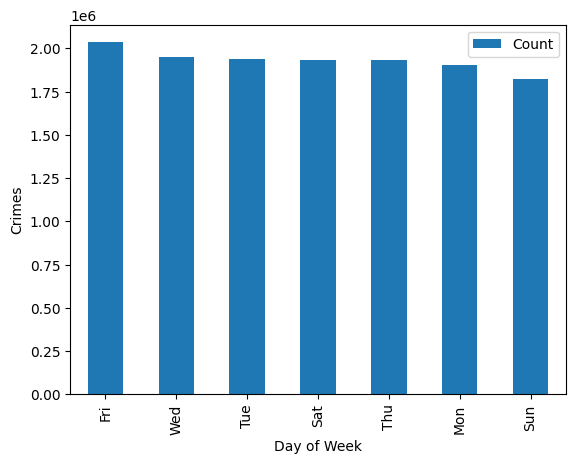

In [124]:
cp.sort_values('Count', ascending=False).plot(kind='bar',x='Day_of_week', y='Count')
plt.xlabel('Day of Week')
plt.ylabel('Crimes')

## (05-01) RDDs setup

In [127]:
ps.show()

+------------+--------------+--------------------+--------------------+------------+------------+--------------------+------------+------------+------------+------------+--------------------+-----------+------------+--------------------+---------------+
|    district| district_name|             address|                city|       state|         zip|             website|       phone|         fax|         tty|x_coordinate|        y_coordinate|   latitude|   longitude|            location|format_district|
+------------+--------------+--------------------+--------------------+------------+------------+--------------------+------------+------------+------------+------------+--------------------+-----------+------------+--------------------+---------------+
|Headquarters|  Headquarters| 3510 S Michigan Ave|             Chicago|          IL|       60653|http://home.chica...|        null|        null|        null| 1177731.401|         1881697.404|41.83070169|-87.62339535|(41.8307016873, -...| 

In [129]:
from pyspark import SparkContext

sc = SparkContext.getOrCreate()

In [130]:
psrdd = sc.textFile('police-stations.csv')

In [131]:
psrdd.first()

'"district","district_name","address","city","state","zip","website","phone","fax","tty","x_coordinate","y_coordinate","latitude","longitude","location"'

In [132]:
ps_header = psrdd.first()

In [134]:
ps_body = psrdd.filter(lambda line: line!=ps_header)
ps_body.first()

'"Headquarters","Headquarters","3510 S Michigan Ave","Chicago","IL","60653","http://home.chicagopolice.org",,,,"1177731.401","1881697.404","41.83070169","-87.62339535","(41.8307016873, -87.6233953459)"'

**How many police stations are there?**

In [137]:
ps_body.map(lambda line: line.split(',')).count()

24

**Display the District ID, District name, Address and Zip for the police station with District ID 7**



In [146]:
id7 = (ps_body.filter(lambda line: line.split(',')[0] =='10').map(lambda line: (line.split(',')[0],
                    line.split(',')[1],
                    line.split(',')[2],
                    line.split(',')[5])).collect())

In [147]:
print(id7)

[]


**Police stations 10 and 11 are geographically close to each other. Display the District ID, District name, address and zip code**